In [92]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [93]:
path1='/content/drive/MyDrive/CODSOFT/Task1_Dataset/train_data.txt'
train=pd.read_csv(path1, sep=':::',names=['Title','Genre','Description'])
train.shape

(54214, 3)

In [94]:
path2='/content/drive/MyDrive/CODSOFT/Task1_Dataset/test_data.txt'
test=pd.read_csv(path2 , sep=':::',names=['Title','Description'])
test.shape

(54200, 2)

In [95]:
path3='/content/drive/MyDrive/CODSOFT/Task1_Dataset/test_data_solution.txt'
test_sol=pd.read_csv(path3 , sep=':::',names=['Title','Genre','Description'])
test_sol.shape

(54200, 3)

In [96]:
corpus = train["Description"].apply(lambda x: re.findall(r'\w+', x.lower()))
word2vec_model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

In [97]:
def get_sentence_embedding(sentence):
    words = re.findall(r'\w+', sentence.lower())
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return sum(vectors) / len(vectors) if vectors else [0] * 100

In [98]:
train["embeddings"] = train["Description"].apply(get_sentence_embedding)
X = pd.DataFrame(train["embeddings"].to_list())

label_encoder = LabelEncoder()
train["genre_encoded"] = label_encoder.fit_transform(train["Genre"])
y = train["genre_encoded"]

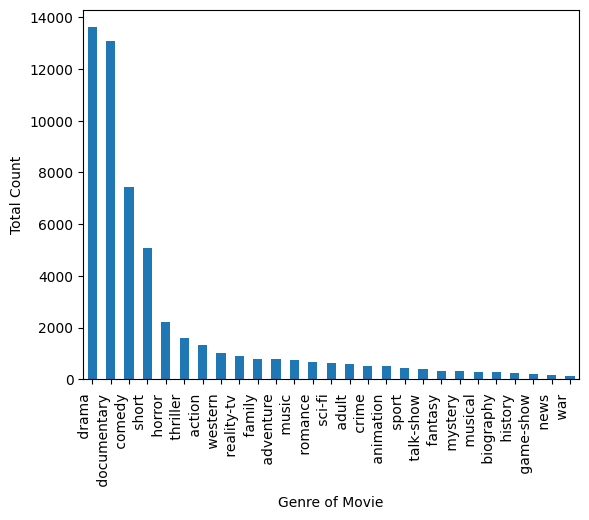

In [99]:
import matplotlib.pyplot as plt
genre_counts = train["Genre"].value_counts()
genre_counts.plot(kind="bar")
plt.xlabel("Genre of Movie")
plt.ylabel("Total Count")
plt.xticks(rotation=90, ha='right')
plt.show()

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1234)
accuracy_list=[]

In [113]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)

accuracy_list.append(['Decision Tree',accuracy])

Accuracy: 0.3127363275846168


In [114]:
#Naive Bayes Classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
p = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
p.fit(X_train,y_train)


predictions = p.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)

accuracy_list.append(['Multinomial Naive Bayes',accuracy])

Accuracy: 0.4280180761781795


In [115]:
#K Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)

predictions = knn.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)

accuracy_list.append(['KNeighbor',accuracy])

Accuracy: 0.4885179378400812


In [116]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, random_state=42)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
accuracy_list.append(['RandomForest',accuracy])

Accuracy: 0.49552706815456976


In [118]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000, multi_class='ovr', verbose=1)

lr.fit(X_train,y_train)

predictions = lr.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)

accuracy_list.append(['LogRegressionOVR',accuracy])

Accuracy: 0.5265148021765194


In [120]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000, multi_class='multinomial', verbose=1)

lr.fit(X_train,y_train)

predictions = lr.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)

accuracy_list.append(['LogRegressionMultinomial',accuracy])

Accuracy: 0.5303882689292632


In [122]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
svc = Pipeline([('Normalizing',StandardScaler()),('SVC',SVC())])
svc.fit(X_train,y_train)

predictions = svc.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)

accuracy_list.append(['SupportVectorClassifier',accuracy])

Accuracy: 0.5448676565526146


In [128]:
print("Accuracy")
for i in accuracy_list:
  print(i[0],"-->",i[1])

Accuracy
Decision Tree --> 0.3127363275846168
Multinomial Naive Bayes --> 0.4280180761781795
KNeighbor --> 0.4885179378400812
RandomForest --> 0.49552706815456976
LogRegressionOVR --> 0.5265148021765194
LogRegressionMultinomial --> 0.5303882689292632
SupportVectorClassifier --> 0.5448676565526146
